In [3]:
from random import choice, uniform
import matplotlib.pyplot as plt


def get_points(init_x, init_y, n):
    all_x = init_x.copy()
    all_y = init_y.copy()
    new_point = get_rand_point_within_triangle(init_x, init_y)
    for i in range(n):
        rand_vert_idx = choice([0, 1, 2])
        chosen_vertex = (init_x[rand_vert_idx], init_y[rand_vert_idx])
        mid_point = get_mid_point(new_point, chosen_vertex, )
        all_x.append(mid_point[0])
        all_y.append(mid_point[1])
        new_point = mid_point

    return all_x, all_y


def get_mid_point(p1, p2):
    mid_x = (p1[0] + p2[0])/2
    mid_y = (p1[1] + p2[1])/2
    return round(mid_x, 2), round(mid_y, 2)


def area(x_arr, y_arr):
    return abs((x_arr[0] * (y_arr[1] - y_arr[2]) + x_arr[1] * (y_arr[2] - y_arr[0])
                + x_arr[2] * (y_arr[0] - y_arr[1])) / 2.0)


def check_that_fits(rand_x, rand_y, init_x, init_y):
    A = area(init_x, init_y)
    A1 = area([rand_x, init_x[1], init_x[2]], [rand_y, init_y[1], init_y[2]])
    A2 = area([init_x[0], rand_x, init_x[2]], [init_y[0], rand_y, init_y[2]])
    A3 = area([init_x[0], init_x[1], rand_x], [init_y[0], init_y[1], rand_y])

    if A == A1 + A2 + A3:
        return True
    else:
        return False


def get_rand_point_within_triangle(init_x, init_y):
    while True:
        rand_x = uniform(min(init_x), max(init_x))
        rand_y = uniform(min(init_y), max(init_y))
        if check_that_fits(rand_x, rand_y, init_x, init_y):
            return round(rand_x, 1), round(rand_y, 1)

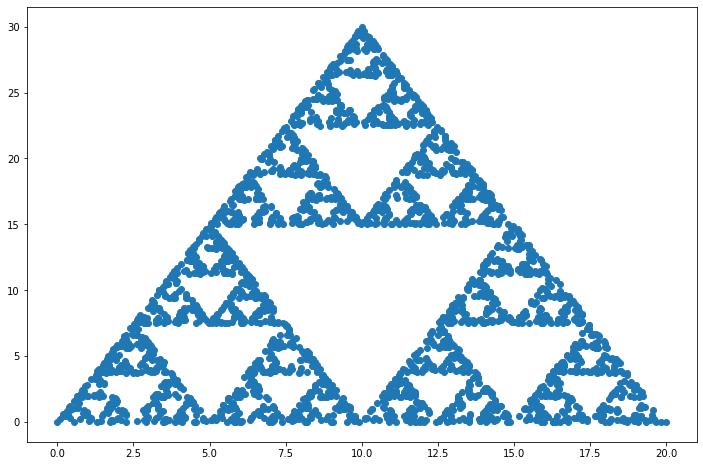

In [7]:
init_x = [0, 10, 20]
init_y = [0, 30, 0]
all_x, all_y = get_points(init_x, init_y, 3000)
plt.figure(figsize=(12,8))
plt.scatter(all_x, all_y)
plt.show()